(2114:03:title)=  

# Working with Data

:::{admonition} Learning Objectives  
Be able to:
* open data files (.txt, .xlsx) using `pandas`
* present the data in a table
* clean and modify the data as needed
* represent the cleaned data in a scatter plot using `pyplot` from the package `matplotlib`
* fit the data using `curve_fit` from the package `scipy.optimize`
* export a table of data into an *Excel* file
* review functions, list comprehensions, random numbers and selecting data using conditionals
:::

First we need to import the packages we will need in this notebook:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

:::{index} file paths, reading data files, import data 
:::

## Importing / Reading data using `pandas`

### Define your file path 

First we need to define our path to the file we want to import.  If you find the file on your machine, you can right click on it and select properties. 

:::{image} ../images/file_properties.png
:width: 300px
:align: center
:::

<img alt="open google forms" src="../images/file_properties.png" width=300px>

By highlighting the text in the "location" box you can copy ctrl-c and paste directly in your notebook ctrl-v.  For me this would give: 

C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\Course ebooks\Python-for-MSE\data_for_practice

now I just need to add "\filename" to the end.  For example, 

C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\Course ebooks\Python-for-MSE\data_for_practice\\[Student credit hours dept numbers.xlsx](https://drive.google.com/uc?export=download&id=1Be63US3GuUPUL4aR0Yj8ZhD9OXJ_5vE_)

It is very important to remember to include the file extension at the end. 

Below I define the path separate from the filename and then join them together.  This is often more convenient if you are grabbing multiple files from the same path. 

In [71]:
import os  #we use this to join our file path to our filename
path = r'C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\Course ebooks\Python-for-MSE\data_for_practice'
filename='Student credit hours dept numbers.xlsx'
fullpath=os.path.join(path,filename)
fullpath

'C:\\Users\\Sean\\OneDrive - Virginia Tech\\Documents\\Teaching\\Course ebooks\\Python-for-MSE\\data_for_practice\\Student credit hours dept numbers.xlsx'

(2114_import_data)=
### Read the file

Let's take a look at some student credit hours taught for engineering departments. 

:::{index} read_excel, pandas read_excel
:::

In [7]:
path = r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\data for practice"
filename='Student credit hours dept numbers.xlsx'
fullpath=os.path.join(path,filename)

raw_excel=pd.read_excel(fullpath)
raw_excel.head(7)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,Fall 2018 SCH,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,# faculty,Dept,on campus,off campus,Total,SCH / Faculty


## Clean the data

:::{index} pandas dropna, dropna, drop, pandas drop, pandas fillna, fillna, pandas sort_values, sort_values
:::

In [12]:
# let's drop rows and columns that have no data
df=raw_excel.dropna(how='all', axis=0) #removes rows
# try changing 'all' to 'any' in these commands.  What is the result? 
df=df.dropna(how='all', axis=1) #now remove columns
df.head(6)

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
5,NaN,NaN,Fall 2018 SCH,NaN,NaN,NaN
6,# faculty,Dept,on campus,off campus,Total,SCH / Faculty
8,29,AOE,7313,318,7631,263.137931
9,NaN,BMES,1432,NaN,1432,NaN
10,58,CEE,10240,224,10464,180.413793
11,18,CHE,2951,NaN,2350,130.555556


looks like we have an extra row at the top.  Let's drop that one also.  Notice the left column which is the row index is 5 so we drop by identifying the index.  

:::{index} pandas rename columns
:::

In [13]:
df=df.drop(5)
# now lets rename our columns
df.columns=['num faculty','dept','on campus','off campus', 'total', 'SCH per faculty']
df.head(6)

,num faculty,dept,on campus,off campus,total,SCH per faculty
6,# faculty,Dept,on campus,off campus,Total,SCH / Faculty
8,29,AOE,7313,318,7631,263.137931
9,NaN,BMES,1432,NaN,1432,NaN
10,58,CEE,10240,224,10464,180.413793
11,18,CHE,2951,NaN,2350,130.555556
12,NaN,CNST,2951,NaN,2951,NaN


In [15]:
df=df.drop(6) # we don't need the first row again now labeled "6"
df=df.reset_index(drop=True) #reset row numbering
df=df.fillna(0) #replace NaN with 0
df.head(6)

,num faculty,dept,on campus,off campus,total,SCH per faculty
0,29,AOE,7313,318,7631.0,263.137931
1,0,BMES,1432,0,1432.0,0.000000
2,58,CEE,10240,224,10464.0,180.413793
3,18,CHE,2951,0,2350.0,130.555556
4,0,CNST,2951,0,2951.0,0.000000
5,55,CS,17257,1122,18379.0,334.163636


## Analysis of data

### sorting, slicing, math on columns, adding new columns

:::{index} pandas sort_values, pandas reset_index, sort_values, reset_index
:::

In [16]:
# sort data frame by values in column "num faculty"
sch_data=df.sort_values(['num faculty','dept']).reset_index(drop=True)
#try removing ".reset_index()" and see what you get
#or change drop=True to drop=False and see what happens
sch_data

,num faculty,dept,on campus,off campus,total,SCH per faculty
0,0,0,0,Average:,7257.928571,200.426961
1,0,0,0,Median:,5966.000000,207.760000
2,0,BMES,1432,0,1432.000000,0.000000
3,0,CNST,2951,0,2951.000000,0.000000
4,0,ENGR,2104,30,2134.000000,0.000000
5,13,MINE,1095,0,1095.000000,84.230769
6,18,CHE,2951,0,2350.000000,130.555556
7,21,MSE,3771,75,3846.000000,183.142857
8,25,ENGE,5194,0,5194.000000,207.760000
9,29,AOE,7313,318,7631.000000,263.137931


In [17]:
# we don't need lines 0 - 4 so let's take only 5-15
sch_data=sch_data[5:16]
sch_data

,num faculty,dept,on campus,off campus,total,SCH per faculty
5,13,MINE,1095,0,1095.0,84.230769
6,18,CHE,2951,0,2350.0,130.555556
7,21,MSE,3771,75,3846.0,183.142857
8,25,ENGE,5194,0,5194.0,207.760000
9,29,AOE,7313,318,7631.0,263.137931
10,32,ISE,7015,118,7133.0,222.906250
11,43,ESM + BEAM,6606,132,6738.0,156.697674
12,55,CS,17257,1122,18379.0,334.163636
13,58,CEE,10240,224,10464.0,180.413793
14,62,ME,10416,2563,12979.0,209.338710


In [18]:
sch_data=sch_data.reset_index(drop="True")
sch_data

,num faculty,dept,on campus,off campus,total,SCH per faculty
0,13,MINE,1095,0,1095.0,84.230769
1,18,CHE,2951,0,2350.0,130.555556
2,21,MSE,3771,75,3846.0,183.142857
3,25,ENGE,5194,0,5194.0,207.760000
4,29,AOE,7313,318,7631.0,263.137931
5,32,ISE,7015,118,7133.0,222.906250
6,43,ESM + BEAM,6606,132,6738.0,156.697674
7,55,CS,17257,1122,18379.0,334.163636
8,58,CEE,10240,224,10464.0,180.413793
9,62,ME,10416,2563,12979.0,209.338710


:::{index} pandas loc[], loc[]
:::

In [19]:
# Let's just take the first 5 columns
sch_data=sch_data.loc[:,'num faculty':'total']
sch_data

,num faculty,dept,on campus,off campus,total
0,13,MINE,1095,0,1095.0
1,18,CHE,2951,0,2350.0
2,21,MSE,3771,75,3846.0
3,25,ENGE,5194,0,5194.0
4,29,AOE,7313,318,7631.0
5,32,ISE,7015,118,7133.0
6,43,ESM + BEAM,6606,132,6738.0
7,55,CS,17257,1122,18379.0
8,58,CEE,10240,224,10464.0
9,62,ME,10416,2563,12979.0


We can easily refer to a column of data by its header, for example:

In [20]:
sch_data['dept']

0           MINE
1            CHE
2            MSE
3           ENGE
4            AOE
5            ISE
6     ESM + BEAM
7             CS
8            CEE
9             ME
10           ECE
Name: dept, dtype: object

Let's take the total credit hours and divide by the total faculty then add this to our dataframe.  

In [21]:
sch_data['credit_faculty']=sch_data['total']/sch_data['num faculty']
sch_data

,num faculty,dept,on campus,off campus,total,credit_faculty
0,13,MINE,1095,0,1095.0,84.230769
1,18,CHE,2951,0,2350.0,130.555556
2,21,MSE,3771,75,3846.0,183.142857
3,25,ENGE,5194,0,5194.0,207.760000
4,29,AOE,7313,318,7631.0,263.137931
5,32,ISE,7015,118,7133.0,222.906250
6,43,ESM + BEAM,6606,132,6738.0,156.697674
7,55,CS,17257,1122,18379.0,334.163636
8,58,CEE,10240,224,10464.0,180.413793
9,62,ME,10416,2563,12979.0,209.338710


:::{index} plt.plot, matplotlib plot, pyplot, plotting data 
:::

## Plotting the data

now let's plot the credit_faculty vs the num faculty

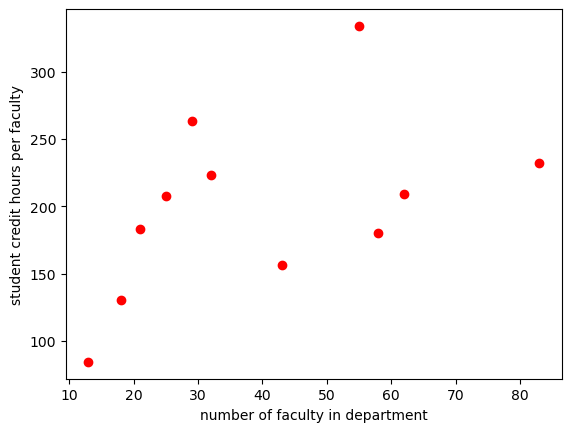

In [25]:
# plt.plot(x, y, 'formatting') 'ro' means red points
plt.plot(sch_data['num faculty'], sch_data['credit_faculty'], 'ro')
plt.ylabel('student credit hours per faculty')
plt.xlabel('number of faculty in department')
plt.show()

It looks like a linear relationship exists for smaller departments.  Let's fit the data for departments with faculty less than 30.

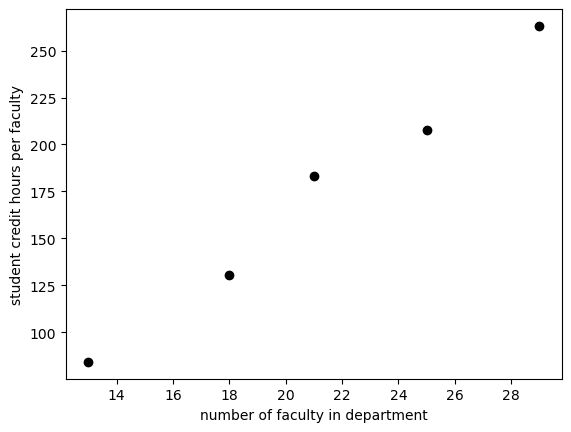

In [28]:
sch_slice=sch_data[0:5]
# plt.plot(x, y, 'formatting') 'ro' means red points
plt.plot(sch_slice['num faculty'], sch_slice['credit_faculty'], 'ko')
plt.ylabel('student credit hours per faculty')
plt.xlabel('number of faculty in department')
plt.show()

:::{index} scipy, scipy.optimize, optimize, curve_fit, scipy curve_fit, curve fitting, fitting data, data fitting 
:::

## Fitting data using scipy.optimize curvefit

In [26]:
#read in package for curve fitting
from scipy.optimize import curve_fit

In [29]:
#define a function for the fit.  In this case just a line
def lin(x, m, b):
    return m*x+b

best_vals, covar = curve_fit(lin, sch_slice['num faculty'], sch_slice['credit_faculty'])
print(f'Our fit is given by {best_vals[0]:.2f} x + {best_vals[1]:.2f}')

Our fit is given by 11.11 x + -61.66


In [30]:
print(best_vals) #these are in order as defined in function i.e. m , b

[ 11.10513878 -61.66351949]


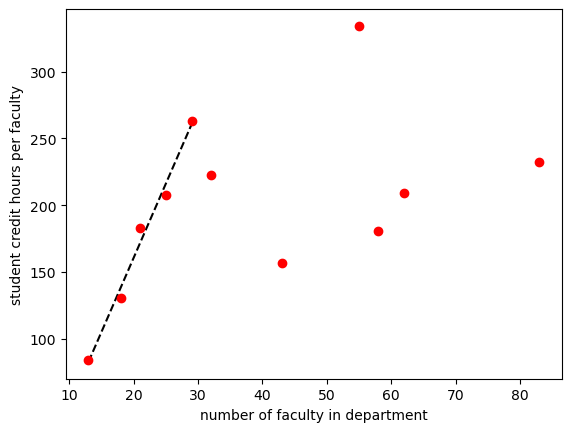

In [33]:
plt.plot(sch_slice['num faculty'], lin(sch_slice['num faculty'],11.105,-61.6635), 'k--')
plt.plot(sch_data['num faculty'], sch_data['credit_faculty'], 'ro')
plt.ylabel('student credit hours per faculty')
plt.xlabel('number of faculty in department')
plt.show()

Let's add a horizontal line at 275

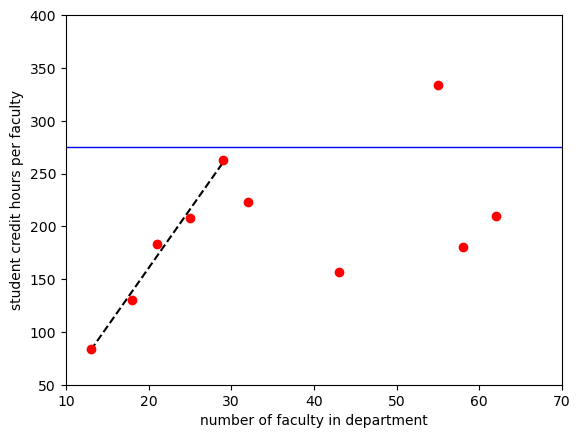

In [34]:
plt.plot(sch_slice['num faculty'], lin(sch_slice['num faculty'],11.105,-61.6635), 'k--')
plt.plot(sch_data['num faculty'], sch_data['credit_faculty'], 'ro')
plt.axhline(y=275, linewidth=1, color='b', linestyle='-')
plt.axis([10,70,50,400]) #specify axis limits like this
plt.ylabel('student credit hours per faculty')
plt.xlabel('number of faculty in department')
plt.show()

## Exporting data to excel

### Double check the data that you want to export

In [35]:
# .loc[rows, columns] lets us use the names of the columns and rows
#in our case rows = ":" which means all rows
# columns is a list of columns to take ["num faculty",'credit_faculty']
data_to_save=sch_data.loc[:,["num faculty",'credit_faculty']]
data_to_save

,num faculty,credit_faculty
0,13,84.230769
1,18,130.555556
2,21,183.142857
3,25,207.760000
4,29,263.137931
5,32,222.906250
6,43,156.697674
7,55,334.163636
8,58,180.413793
9,62,209.338710


### Export

In [36]:
path = r"C:\Users\Sean\OneDrive - Virginia Tech\Documents\Teaching\2114 & 3114 Math I & II\git_2114_3114\data for practice"
filename='lesson 3 outfile.xlsx'
outpath=os.path.join(path,filename)

data_to_save.to_excel(outpath, index = True, header=True)
#try changing index=True and check your output file 

Here's what my excel file looks like: 

:::{image} ../images/excel_clip.png
:width: 250px
:align: center
:::

<img alt="open google forms" src="../images/excel_clip.png" width=250px>

## Exercises

The problems below may require the ability to:
* import an excel file
* define a function
* use `if`, `elif`, `else` statements
* use `numpy.array()` to multiply a sequence of numbers
* generate a random number using `np.random.random()`
* use `matplotlib` to make a scatter plot

### Review of some coding that may make the homework exercises easier.

:::{index} if, elif, else, piecewise function, linspace
:::

#### Using `if`, `elif`, `else` statements

In [42]:
def piecewise(var1, var2, var3): # use the ratio var3/var1 to return different outputs
    # variable var2 is not actually used but the function doesn't care
    
    # first if, else statement to avoid dividing by zero
    if var1 ==0:
        return(0)
    else: ratio=var3/var1
    
    #second if, elif, else statement
    if ratio < 0:
        return(50)
    elif ratio == 0:
        return(1)
    elif ratio == 0.5:
        return(60)
    else: return(ratio)

In [38]:
np.linspace(-1,4,21) # linspace is used to generate a list of equally spaced points

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
        1.25,  1.5 ,  1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,
        3.5 ,  3.75,  4.  ])

In [43]:
[piecewise(x,3,1.5) for x in [0,1,2,3]] #list comprehension -- short method to make a loop

[0, 1.5, 0.75, 60]

In [70]:
# compare the above to
out=[]
for x in range(4):
    out.append(piecewise(x,3,1.5))
out

[0, 1.5, 0.75, 60]

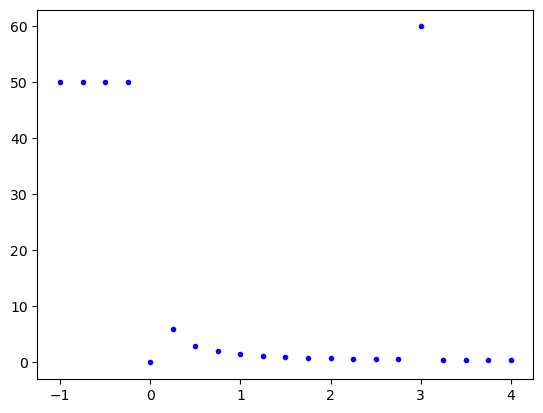

In [45]:
plt.plot(np.linspace(-1,4,21), [piecewise(x,3,1.5) for x in np.linspace(-1,4,21)], 'b.')
plt.show()

#### Let's determine if a few points fall inside a circle with center (0.5, 0.5) and radius 0.7

:::{index} np.random.random, random, add_patch, matplotlib add_patch, plt add_patch, set_aspect, aspect, plt set_aspect
:::

In [46]:
np.random.random()

0.11949452264943106

In [64]:
np.random.random(5) #give me 5 random points

array([0.02570857, 0.2393304 , 0.15681669, 0.17950396, 0.23284677])

In [65]:
# !! important note:  I use np.array below because I'm manually typing out a few coordinates
#  you will use np.random.random() which will automatically give you an array as its output
xcoord=np.array([0, 0.5, 1,0.5]) #convert lists [] to numpy array
ycoord=np.array([0, -0.5, 0.8,0.5])
magnitude=np.sqrt((xcoord-0.5)**2+(ycoord-0.5)**2)
magnitude

array([0.70710678, 1.        , 0.58309519, 0.        ])

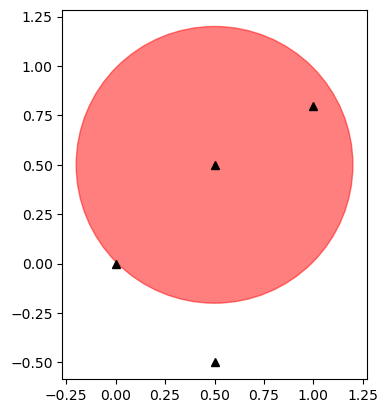

In [66]:
fig, ax = plt.subplots()
ax.plot(xcoord, ycoord, 'k^')
ax.add_patch(plt.Circle((0.5, 0.5), 0.7, color='r', alpha=0.5))
ax.set_aspect('equal')
plt.show()

In [58]:
test=magnitude<0.7
x=xcoord[test] #take all x values where magnitude array is <0.7
y=ycoord[test] #take all y values where magnitude array is <0.7

:::{index} opacity (alpha), Circle, plt Circle, plt opacity (alpha), combine shape and plot
:::

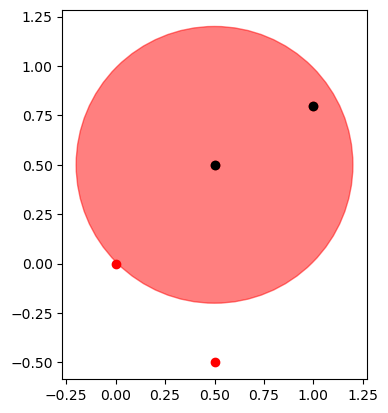

In [59]:
fig, ax = plt.subplots()
ax.plot(xcoord, ycoord, 'ro') # 'ro' means red points
ax.plot(x, y, 'ko') #'ko' means black points
ax.add_patch(plt.Circle((0.5, 0.5), 0.7, color='r', alpha=0.5))
ax.set_aspect('equal')
plt.show()

In [60]:
# if you want to find the length of a list
len(xcoord)

4

### Problem 1: 

File needed:  [Al7075.xlsx](https://drive.google.com/uc?export=download&id=1LDDjq0c6jmIWC1eKlxk9j6eIOllaKHrN)


(a) Import the load-length data in file "Al7075.xlsx" The header in the excel file should give you all the information you need.  Plot the stress-strain data.  Put the stress in units of MPa.  

(b) Take the first couple of data points and determine the slope by fitting a straight line to the data.  You may want to replot the first quarter or so of the original plot so that you can see how far the linear region extends.  

(c) Add a line to your plot that starts at a strain of 0.002 and has the slope found previously.  Plot this line so that it intersects the stress-strain data curve and read off the yield strength.  You should only plot the first quarter or so of the original plot so that you can clearly see the yield point value.  

(d) Add a horizontal line to your plot at the yield point value estimated above. Refine your estimate if your horizontal line does not pass correctly through the intersection point.  

(e) Export your data to a new excel file with a name of your choosing. 

### Problem 2: 
<hr style="height: 3.0px"/>

Write a function that given the ionic radii for a simple ceramic compound (2 elements) returns the expected coordination number.  The coordinaton numbers versus ratio of the radii can be found in Chapter 12,  Table 12.2 on page 408 in Callister 10th ed. and is shown below. Your function should check if your ratio is greater than 1.0.  If it is, then take the inverse of your ratio.  You may want to consider the `if` `elif` `else` conditionals. Test your function by calculating the coordination number for NaCl.  Remember to use the ionic radii not the atomic radii.  

  

:::{image} ../images/Callister_Chap_12.png
:width: 350px
:align: center
:::

<img alt="open google forms" src="../images/Callister_Chap_12.png" width=350px>

### Problem 3: 
<hr style="height: 3.0px"/>

Pick 1000 random points in a square of edge length 2 centered at (0,0).  Determine how many of these points are contained in a circle of radius 1 centered at (0,0).  Multiply the ratio of points in the circle to the total number of points by 4, i.e. $4\times \frac{\text{pts in circle}}{\text{total num pts}}$.  Try 10,000 points.  What do you get?